# Dimensiones observables de calidad de mercado
---
Este notebook presenta los resultados de las funciones desarrolladas para el cálculo de parámetros de calidad de mercado intradía. A manera de ejemplo, estas funciones son aplicadas a una base de datos de Ecopetrol (ECOPETL). Los resultados son presentados de la siguiente forma:

**I. Cálculos**

 1. Cálculo de precios: BID, ASK, *mid-price* y *quoted spread*.
 2. Cálculo de profundidades: *bid depth* y *ask depth*
 3. Cálculo del *order flow*
 4. Cálculo de la log-profundidad, volatilidad, spread y volumen total
 
**II. Resampleo de los datos**

En esta sección se estandarizan los resultados en su etiqueta de hora para facilitar el análisis y la comparación.
 
**III. Visualización**
 1. Log-profundidad
 2. Volatilidad
 3. Spread
 4. Volumen

# I. Cálculos

## 1. Importamos los datos
---
Comenzamos inicializando la base de datos

In [51]:
# Importamos las funciones predefinidas en la secuencia de preprocesamiento

from PreprocessPipeline import *

# Importamos las demas librerias
import pandas as pd
import os

In [2]:
# Comenzamos importando los datos

# Ruta del archivo
pathData = os.getcwd() + "/datos completos.csv"

# Definimos nuestro DataFrame
data = pd.read_csv(pathData, parse_dates=[2], sep=',', na_values='NA',low_memory=False)

# Primera visualizacion de los datos
data.head()

,Unnamed: 0,name,times,type,value,size,condcode
0,1,BBVACOL CB Equity,2017-03-03 09:30:00,BID,0.0,0.0,NaN
1,2,BBVACOL CB Equity,2017-03-03 09:30:00,ASK,0.0,0.0,NaN
2,3,BBVACOL CB Equity,2017-03-03 09:30:00,ASK,295.0,30890.0,NaN
3,4,BBVACOL CB Equity,2017-03-03 09:30:00,ASK,295.0,75244.0,NaN
4,5,BBVACOL CB Equity,2017-03-03 09:30:00,BID,255.0,17660.0,NaN


## 2. Cálculo de precios
---
Los parámetros BID, ASK, *mid-price* y *quoted spread* son inicializados simultáneamente. Esto se debe a la facilidad de acoplar los cálculos de estos parámetros con el preprocesamiento de nuestra base de datos (ver `PreprocessPipeline.ipynb` para más detalles del preprocesamiento).

**Precios bid y ask**

Como notación, denotamos los precios *bid* y *ask* en un tiempo *t* como $b_t$ y $a_t$ respectivamente. Estos precios corresponden a los valores a los cuales los agentes compran o venden un activo en el mercado, respectivamente.

**Precio medio**

En este trabajo definimos el precio de mercado como el precio medio, calculado como:

$$M_t = \frac{1}{2}(a_t+b_t)$$

**Quoted spread**

El *quoted spread* (QS) se define como la distancia que un comprador/vendedor debe cruzar para realizar una transacción. En este sentido, el QS define el costo de ejecutar una transacción inmediatamente. De esta manera, el QS sería la distancia media entre los precios de *bid* y *ask* normalizado con el precio medio:

$$QS_t = \frac{a_t-b_t}{2M_t}$$

In [3]:
# Aplicamos la funcion StockPreprocessing() para nuestra base de datos
# nos interesan los datos de ECOPETL
prep_data = StockPreprocessing(data, "ECOPETL")

prep_data.head()

,nombre,date_time,tipo,precio,volumen,dia,BID,ASK,Mid_price,Quoted_Spread
date_time,,,,,,,,,,
2017-03-03 09:30:00,ECOPETL CB Equity,2017-03-03 09:30:00,ASK,1320.0,360000.0,2017-03-03,0.0,1320.0,660.0,2.000000
2017-03-03 09:30:00,ECOPETL CB Equity,2017-03-03 09:30:00,BID,1305.0,100000.0,2017-03-03,1305.0,1320.0,1312.5,0.011429
2017-03-03 09:30:02,ECOPETL CB Equity,2017-03-03 09:30:02,ASK,1315.0,80000.0,2017-03-03,1305.0,1315.0,1310.0,0.007634
2017-03-03 09:30:03,ECOPETL CB Equity,2017-03-03 09:30:03,ASK,1315.0,155240.0,2017-03-03,1305.0,1315.0,1310.0,0.007634
2017-03-03 09:30:12,ECOPETL CB Equity,2017-03-03 09:30:12,BID,1305.0,170000.0,2017-03-03,1305.0,1315.0,1310.0,0.007634


## 3. Cálculo de profundidades
---
La profundidad mide la cantidad de activos que están disponibles para transar. En este trabajo, calculamos las profundidades que están disponibles:
 * Para comprar: *bid-depth* 
  * $q_t^b$
 * Para vender *ask-depth* 
  * $q_t^a$
 * Profundidad total 
  * $DP_t = q_t^b + q_t^b$
 
Generalmente, es más simple trabajar con la log-profundidad total, la cual se define como: 

$$\ln(DP_t) = \ln(q_t^a) + \ln(q_t^b)$$

In [4]:
# Calculamos bid-depth y ask-depth
depth_data = %time StockDepth(prep_data)

CPU times: user 9h 6min 41s, sys: 6min 38s, total: 9h 13min 20s
Wall time: 8h 59min 15s


In [57]:
# Visualizamos los resultados
depth_data.head()

,nombre,date_time,tipo,precio,volumen,dia,BID,ASK,Mid_price,Quoted_Spread,BID_depth,ASK_depth,Depth,log_depth
date_time,,,,,,,,,,,,,,
2017-03-03 09:30:00,ECOPETL CB Equity,2017-03-03 09:30:00,ASK,1320.0,360000.0,2017-03-03,0.0,1320.0,660.0,2.000000,360000.0,360000.0,720000.0,25.587719
2017-03-03 09:30:00,ECOPETL CB Equity,2017-03-03 09:30:00,BID,1305.0,100000.0,2017-03-03,1305.0,1320.0,1312.5,0.011429,100000.0,360000.0,460000.0,24.306785
2017-03-03 09:30:02,ECOPETL CB Equity,2017-03-03 09:30:02,ASK,1315.0,80000.0,2017-03-03,1305.0,1315.0,1310.0,0.007634,100000.0,80000.0,180000.0,22.802707
2017-03-03 09:30:03,ECOPETL CB Equity,2017-03-03 09:30:03,ASK,1315.0,155240.0,2017-03-03,1305.0,1315.0,1310.0,0.007634,100000.0,235240.0,335240.0,23.881287
2017-03-03 09:30:12,ECOPETL CB Equity,2017-03-03 09:30:12,BID,1305.0,170000.0,2017-03-03,1305.0,1315.0,1310.0,0.007634,270000.0,235240.0,505240.0,24.874539


## 4. Dirección de la transacción
---
Podemos determinar la partida que inicia la transacción. Comparando el precio medio con el precio ofrecido, podemos encontrar si la orden es emitida por un comprador o un vendedor. Esto es llamado la dirección de transacción $D$, la cual será:

 * $D=+1$: La transacción es iniciada por el comprador
 * $D=-1$: La transacción es iniciada por el vendedor

In [6]:
# Calculamos quien inicia la transaccion
init_party = InitiatingParty(prep_data)

# Visualizamos los resultados
init_party.head()

,nombre,date_time,tipo,precio,volumen,dia,BID,ASK,Mid_price,Quoted_Spread,iniciado
date_time,,,,,,,,,,,
2017-03-03 09:30:14,ECOPETL CB Equity,2017-03-03 09:30:14,TRADE,1315.0,2000.0,2017-03-03,1305.0,1315.0,1310.0,0.007634,1
2017-03-03 09:30:22,ECOPETL CB Equity,2017-03-03 09:30:22,TRADE,1305.0,1000.0,2017-03-03,1305.0,1315.0,1310.0,0.007634,-1
2017-03-03 09:30:40,ECOPETL CB Equity,2017-03-03 09:30:40,TRADE,1305.0,1351.0,2017-03-03,1305.0,1315.0,1310.0,0.007634,-1
2017-03-03 09:31:00,ECOPETL CB Equity,2017-03-03 09:31:00,TRADE,1305.0,500.0,2017-03-03,1305.0,1315.0,1310.0,0.007634,-1
2017-03-03 09:31:00,ECOPETL CB Equity,2017-03-03 09:31:00,TRADE,1305.0,500.0,2017-03-03,1305.0,1315.0,1310.0,0.007634,-1


## 5. Order flow
---
El order flow es un proxy de la demanda neta de un activo. Este parámetro mide la diferencia entre el número de *shares* compradas agresivamente y el número de *shares* vendidas agresivamente. De esta manera, el *order flow* nos indica si un activo está siendo más comprado o más vendido en un mercado.

In [7]:
# Calculamos los parametros de impacto
impact_params = ImpactParameters(init_party)

# Visualizamos los resultados
impact_params.head()

,nombre,date_time,tipo,precio,volumen,dia,BID,ASK,Mid_price,Quoted_Spread,iniciado,delta_p,order_flow
date_time,,,,,,,,,,,,,
2017-03-03 09:30:14,ECOPETL CB Equity,2017-03-03 09:30:14,TRADE,1315.0,2000.0,2017-03-03,1305.0,1315.0,1310.0,0.007634,1,NaN,2000.0
2017-03-03 09:30:22,ECOPETL CB Equity,2017-03-03 09:30:22,TRADE,1305.0,1000.0,2017-03-03,1305.0,1315.0,1310.0,0.007634,-1,-10.0,-1000.0
2017-03-03 09:30:40,ECOPETL CB Equity,2017-03-03 09:30:40,TRADE,1305.0,1351.0,2017-03-03,1305.0,1315.0,1310.0,0.007634,-1,0.0,-1351.0
2017-03-03 09:31:00,ECOPETL CB Equity,2017-03-03 09:31:00,TRADE,1305.0,500.0,2017-03-03,1305.0,1315.0,1310.0,0.007634,-1,0.0,-500.0
2017-03-03 09:31:00,ECOPETL CB Equity,2017-03-03 09:31:00,TRADE,1305.0,500.0,2017-03-03,1305.0,1315.0,1310.0,0.007634,-1,0.0,-500.0


# II. Resampleo de los datos
---
Nos interesa ver el comportamiento intradía de estos parámetros. Para poder reducir el ruido de microestructura y comparar los comportamientos a las diferentes horas, nos sirve resamplear los datos cada cinco minutos. En esta sección, se presentan los cálculos realizados. Para más detalles, ver el notebook `Visualization.ipynb`.

## 6. Log-profundidad
---
Debido al gran volumen de transacciones, se acostumbra utilizar el logaritmo de la profundidad. Todos los parámetros calculados a partir de ahora se presentan como una matriz cuyas columnas corresponden a los valores diarios del parámetro correspondiente. Las filas corresponden a la hora a la cual se mide cada parámetro.

In [58]:
from Visualization import *

In [59]:
## Calculamos la log profundidad
log_depth = get_stock_param(depth_data, "ECOPETL", "log_depth")

# Visualizamos el resultado
log_depth.head()

avg_log_depth                                              \
date_time    2017-03-03 2017-03-06 2017-03-07 2017-03-08 2017-03-09   
date_time                                                             
09:30:00      26.273295  28.354659  29.791712  27.198857  24.962752   
09:45:00      29.745084  31.445908  29.607107  32.463281  29.948224   
10:00:00      30.417239  29.291944  28.828670  33.654614  27.536132   
10:15:00      28.703566  27.419951  30.875710  29.353461  28.818083   
10:30:00      27.845431  28.839307  32.976374  28.121146  33.400101   

                                                                  ...  \
date_time 2017-03-10 2017-03-13 2017-03-14 2017-03-15 2017-03-16  ...   
date_time                                                         ...   
09:30:00   27.768871  28.634326  26.919639  26.112666  26.209711  ...   
09:45:00   30.740651  27.730914  28.287679  28.436516  29.429942  ...   
10:00:00   29.828152  29.401895  28.887468  30.589662  32.178041  ...   
10:15:00   31.123637  27.907683  30.315155  31.546102  32.797519  ...   
10:30:00   30.136750  30.258277  27.392835  30.498902  31.687521  ...   

                                                                             \
date_time 2017-08-17 2017-08-18 2017-08-22 2017-08-23 2017-08-24 2017-08-25   
date_time                                                                     
09:30:00   29.739440  25.816245  28.370828  25.168440  27.240726  31.412170   
09:45:00   31.687067  29.536895  30.758390  28.690293  30.598323  30.738255   
10:00:00   33.978057  27.999862  29.412969  28.027758  30.873177  32.301033   
10:15:00   34.871876  29.223602  32.133207  29.856428  26.725845  34.682153   
10:30:00   32.033432  28.458591  33.190718  32.343785  30.251828  33.860365   

                                                       
date_time 2017-08-28 2017-08-29 2017-08-30 2017-08-31  
date_time                                              
09:30:00   30.572486  28.630811  30.381988  29.515126  
09:45:00   34.225468  29.386654  32.308884  33.342033  
10:00:00   28.406855  30.166223  34.121643  32.637458  
10:15:00   33.321112  34.192265  35.557928  33.888489  
10:30:00   32.296151  31.181892  36.196556  29.980420  

[5 rows x 119 columns]

## 7. Volatilidad
---
La volatilidad es una medida de la magnitud de las fluctuaciones de un precio. Puede interpretarse como el costo de la incertidumbre en el valor de un activo. Debido a la poca profundidad del mercado colombiano, en este trabajo se utiliza la volatilidad basada en rango definida como:

$$RR_{t, i}^{\Delta} = \frac{1}{4\ln(2)}\left[ \ln(H_{t, i}) - \ln(L_{t, i}) \right]$$

donde $H_{t, i}$ y $L_{t, i}$ corresponden a los precios máximos y mínimos en un intervalo de tiempo de longitud $\Delta$.

In [60]:
# Calculamos la volatilidad
volat = get_stock_param(depth_data, "ECOPETL", "Volatilidad")

# Visualizamos el resultado
volat.head()

precio                                                         \
date_time 2017-03-03 2017-03-06 2017-03-07 2017-03-08 2017-03-09 2017-03-10   
date_time                                                                     
09:30:00    0.022922   0.033930   0.045498   0.011396   0.011661   0.045845   
09:45:00    0.011396   0.011353   0.011353   0.011396   0.000000   0.011439   
10:00:00    0.011353   0.011396   0.022663   0.011396   0.011707   0.000000   
10:15:00    0.011353   0.011396   0.011353   0.011396   0.000000   0.011483   
10:30:00    0.011310   0.011396   0.000000   0.011310   0.011707   0.011527   

                                                       ...             \
date_time 2017-03-13 2017-03-14 2017-03-15 2017-03-16  ... 2017-08-17   
date_time                                              ...              
09:30:00    0.022835   0.034715   0.011572   0.022835  ...   0.033181   
09:45:00    0.000000   0.023278   0.011572   0.011439  ...   0.000000   
10:00:00    0.011353   0.023368   0.000000   0.011439  ...   0.011019   
10:15:00    0.011353   0.011661   0.000000   0.022922  ...   0.000000   
10:30:00    0.011353   0.011661   0.011572   0.011483  ...   0.010979   

                                                                             \
date_time 2017-08-18 2017-08-22 2017-08-23 2017-08-24 2017-08-25 2017-08-28   
date_time                                                                     
09:30:00    0.022080   0.011019   0.010979   0.010979   0.011019   0.022161   
09:45:00    0.011019   0.021999   0.011019   0.010939   0.011019   0.011142   
10:00:00    0.000000   0.010979   0.000000   0.010939   0.000000   0.011184   
10:15:00    0.011019   0.010979   0.011019   0.010939   0.010979   0.022326   
10:30:00    0.011019   0.010979   0.021918   0.000000   0.000000   0.011142   

                                            
date_time 2017-08-29 2017-08-30 2017-08-31  
date_time                                   
09:30:00    0.011184   0.022326   0.011101  
09:45:00    0.022409   0.000000   0.000000  
10:00:00    0.011184   0.011142   0.011101  
10:15:00    0.000000   0.011142   0.000000  
10:30:00    0.011184   0.011142   0.011101  

[5 rows x 119 columns]

## 8. Spread

In [61]:
# Calculamos el spread
spread = get_stock_param(depth_data, "ECOPETL", "Spread")

# Visualizamos el resultado
spread.head()

Quoted_Spread                                              \
date_time    2017-03-03 2017-03-06 2017-03-07 2017-03-08 2017-03-09   
date_time                                                             
09:30:00       0.030102   0.004877   0.004529   0.074050   0.005527   
09:45:00       0.004556   0.004006   0.004495   0.003795   0.004241   
10:00:00       0.003869   0.004229   0.004651   0.003795   0.004882   
10:15:00       0.004903   0.004608   0.003781   0.004160   0.003993   
10:30:00       0.004185   0.003909   0.003781   0.004106   0.003899   

                                                                  ...  \
date_time 2017-03-10 2017-03-13 2017-03-14 2017-03-15 2017-03-16  ...   
date_time                                                         ...   
09:30:00    0.005264   0.004221   0.109783   0.004079   0.196347  ...   
09:45:00    0.003810   0.004464   0.004354   0.004977   0.004255  ...   
10:00:00    0.005594   0.003975   0.004513   0.003854   0.003810  ...   
10:15:00    0.003824   0.003978   0.004393   0.003854   0.003921  ...   
10:30:00    0.003905   0.003781   0.004216   0.004138   0.003824  ...   

                                                                             \
date_time 2017-08-17 2017-08-18 2017-08-22 2017-08-23 2017-08-24 2017-08-25   
date_time                                                                     
09:30:00    0.030249   0.004604   0.029485   0.004038   0.239083   0.004281   
09:45:00    0.003670   0.003669   0.003784   0.005069   0.004739   0.003722   
10:00:00    0.003670   0.005694   0.003811   0.003670   0.004705   0.003893   
10:15:00    0.003670   0.006078   0.003656   0.004455   0.004146   0.003717   
10:30:00    0.003660   0.004693   0.003656   0.003646   0.003643   0.003877   

                                                       
date_time 2017-08-28 2017-08-29 2017-08-30 2017-08-31  
date_time                                              
09:30:00    0.003733   0.034117   0.019354   0.003697  
09:45:00    0.003734   0.004687   0.003711   0.003697  
10:00:00    0.004324   0.004782   0.003711   0.003688  
10:15:00    0.003751   0.003761   0.003711   0.003748  
10:30:00    0.003711   0.004525   0.003711   0.004672  

[5 rows x 119 columns]

## 9. Volumen

In [62]:
# Calculamos el volumen
volume = get_stock_param(depth_data, "ECOPETL", "Volumen")

# Visualizamos el resultado
volume.head()

date_time,2017-03-03,2017-03-06,2017-03-07,2017-03-08,2017-03-09,2017-03-10,2017-03-13,2017-03-14,2017-03-15,2017-03-16,...,2017-08-17,2017-08-18,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-28,2017-08-29,2017-08-30,2017-08-31
date_time,,,,,,,,,,,,,,,,,,,,,
09:30:00,11.784882,13.480703,14.684590,12.639111,12.542927,13.252484,13.756823,13.704729,13.625571,13.754265,...,14.284561,11.099922,12.942787,10.771659,11.218219,14.132757,14.377181,13.383960,13.705510,11.657883
09:45:00,13.048751,13.509140,11.910083,13.455557,13.366087,12.846591,12.463660,13.761402,10.616388,13.665369,...,9.259226,10.186295,13.082566,10.366781,10.768485,12.435202,15.514273,13.453256,11.959846,12.008968
10:00:00,12.176469,11.673530,12.314003,12.477221,12.737615,11.225257,13.739612,13.277281,8.148735,11.128865,...,11.653565,10.688051,13.575292,10.115004,11.015131,13.349673,14.180009,11.520775,12.038665,13.022835
10:15:00,13.251780,12.475775,12.741489,12.230512,9.606428,12.732365,12.219546,11.842164,9.596147,12.729821,...,10.066116,10.696638,10.085851,11.719525,13.877416,13.178436,14.609371,9.808132,10.116621,13.252147
10:30:00,12.634629,8.272826,11.191356,12.136192,13.206706,12.952424,12.270614,11.826999,13.998911,11.782128,...,12.881226,10.389918,11.794421,13.219570,12.308679,14.149581,13.317175,12.480362,12.257797,14.658611


# III. Visualización
---
Podemos obtener una representación gráfica de los resultados de log-profundidad, volatilidad, spread y volumen con la función `graph()`. Esta función toma como parámetros los datos, el ticker de la acción y el parámetro que nos interesa.

En esta sección presentamos las gráficas de log-profundidad, volatilidad, spread y volumen respectivamente.

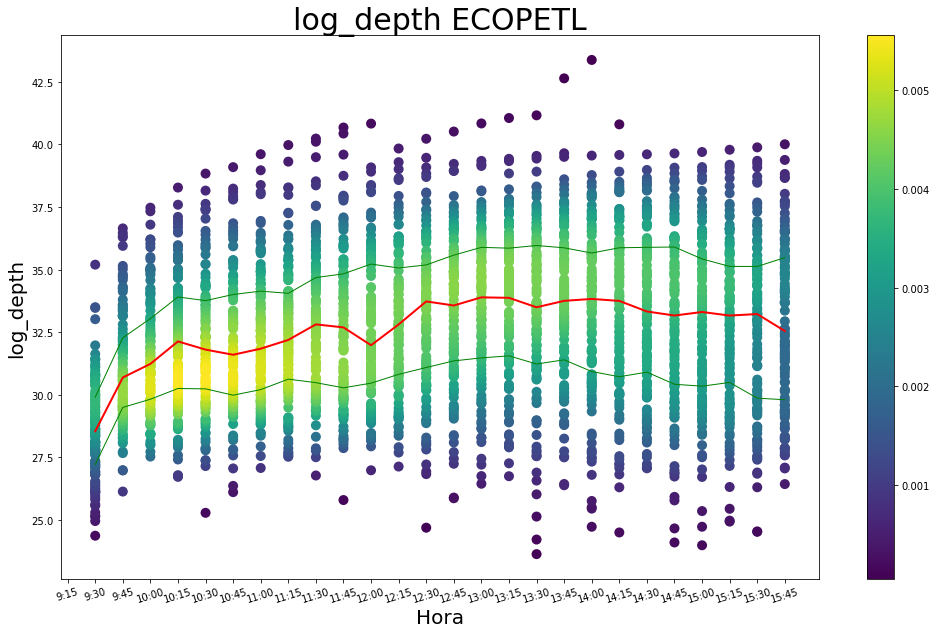

In [63]:
graph(depth_data, "ECOPETL", "log_depth")

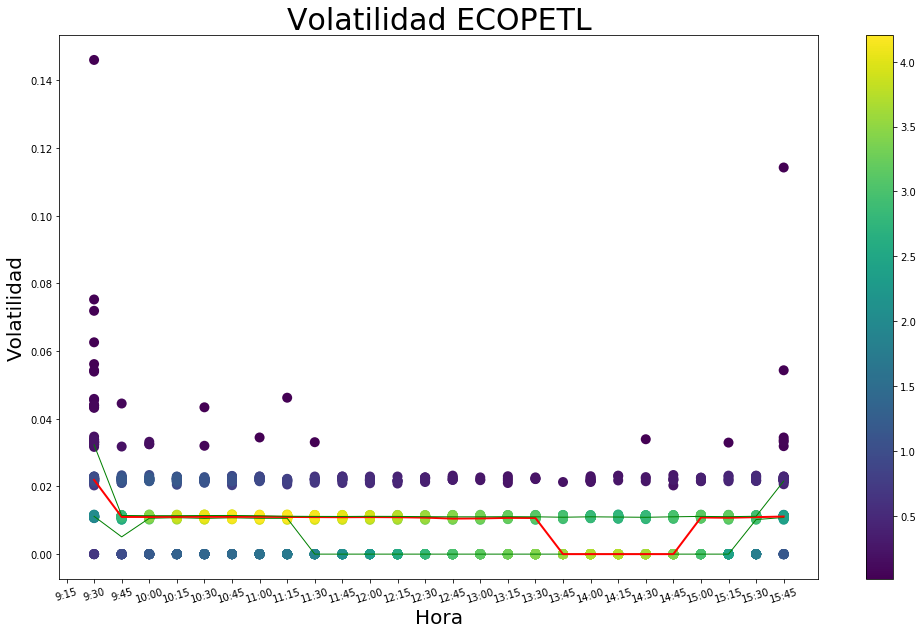

In [64]:
graph(depth_data, "ECOPETL", "Volatilidad")

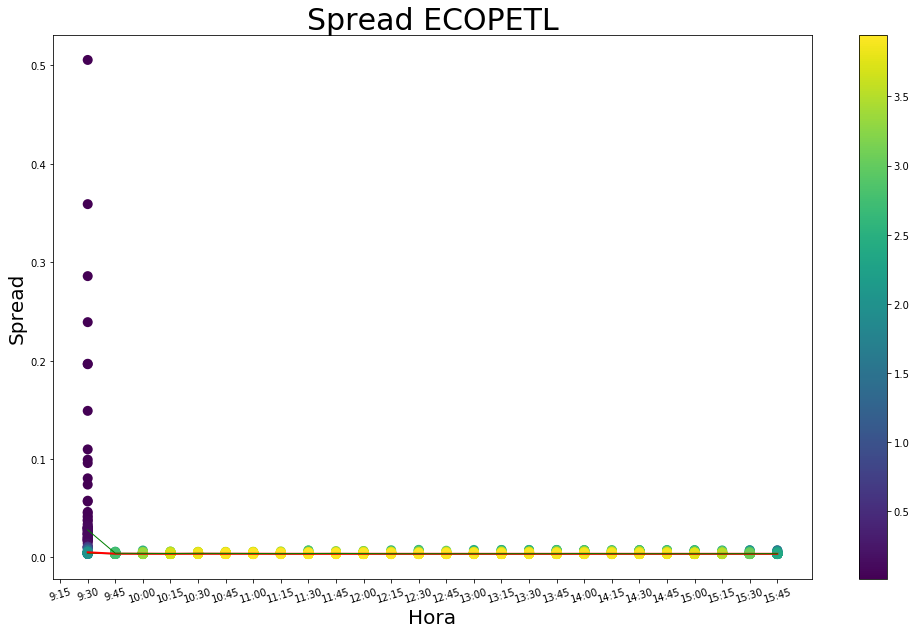

In [65]:
graph(depth_data, "ECOPETL", "Spread")

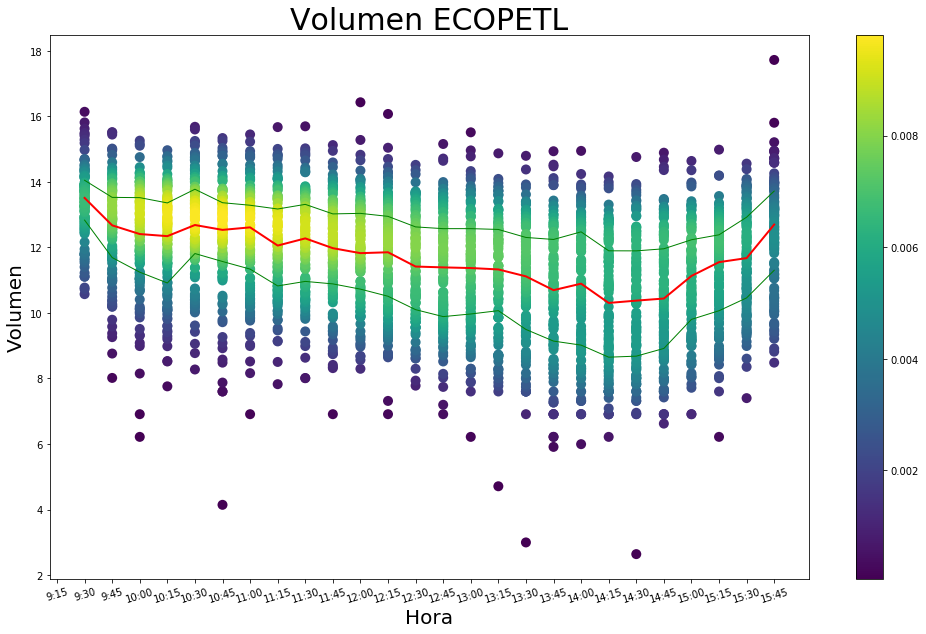

In [66]:
graph(depth_data, "ECOPETL", "Volumen")